# Job characteristics analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

## Read logs

In [2]:
job_chars = pd.read_parquet('data/job_chars.parquet')

In [3]:
job_chars

,Batch_class,Submission_date,Waited,Start_date,Duration,Nodes,CPU,Memory,delta_CPU,delta_Memory
index,,,,,,,,,,
000030ecd19c9c04,feque,2020-02-18 11:14:38+01:00,29.916667,2020-02-18 11:44:33+01:00,1.450000,1.0,0.168851,0.31349,0.000000,0.000000
00020fcd04947084,clexpres,2020-05-30 11:50:05+02:00,5.383333,2020-05-30 11:55:28+02:00,4.700000,2.0,31.315993,2.02000,0.000000,0.000000
0002286e1d7e428d,clmedium,NaT,NaN,2020-09-28 07:55:47+02:00,60.716667,1.0,0.989072,0.04895,0.502306,0.005687
00024ec1bf68e413,clfo2,NaT,NaN,2020-06-29 01:05:19+02:00,0.116667,1.0,0.000000,0.00000,0.000000,0.000000
00027e89035bec8d,clmedium,2020-03-25 21:22:02+01:00,38.783333,2020-03-25 22:00:49+01:00,1.283333,1.0,21.721169,131.76000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
fffbfaccf8c9fbf4,clexpres,NaT,NaN,2020-03-27 15:05:44+01:00,5.033333,1.0,0.190265,0.11484,0.000000,0.000000
fffd086716a4d46c,cllong,NaT,NaN,2020-09-14 00:40:27+02:00,143.616667,1.0,0.994714,0.46693,0.025502,0.000300
ffff38341e8c6b3b,clmedium,2020-08-13 22:35:57+02:00,401.333333,2020-08-14 05:17:17+02:00,621.766667,8.0,31.858035,5.24000,0.662259,0.550000


In [4]:
detected_waiting_time = job_chars['Waited'].notna()
no_detected_waiting_time = job_chars['Waited'].isna()

In [5]:
#Masks to separate queue type: 'clexpres', 'clmedium', 'cllong', 'clbigmem', 'clfo2'
batch_classes = ['clexpres', 'clmedium', 'cllong', 'clbigmem', 'clfo2','feque']

In [6]:
def daily_cycle_mean(df, queue_name, column):
    queues = df.loc[df['Batch_class'].str.contains(queue_name)]
    hourly = queues.groupby(queues['Submission_date'].dt.hour)[column].mean()
    return(hourly)

def weekly_cycle_mean(df, queue_name, column):
    week   = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    queues = df.loc[df['Batch_class'].str.contains(queue_name)]
    weekly = queues.groupby(queues['Submission_date'].dt.day_name())[column].mean().reindex(week)
    return(weekly)

In [7]:
def histogram_dataframe(df, batch_classes, weekly = False):
    waiting_time = {}
    axis   = 'Hour'
    for batch_class in batch_classes:
        if weekly:
            waiting_time[batch_class] = weekly_cycle_mean(df, batch_class, 'Waited')
            axis = 'Day'
        else:
            waiting_time[batch_class] = daily_cycle_mean(df, batch_class, 'Waited')
            
        
    waiting_time_df = pd.DataFrame(waiting_time).rename_axis(axis)
    return(waiting_time_df)

Text(0, 0.5, 'Waiting times in hours')

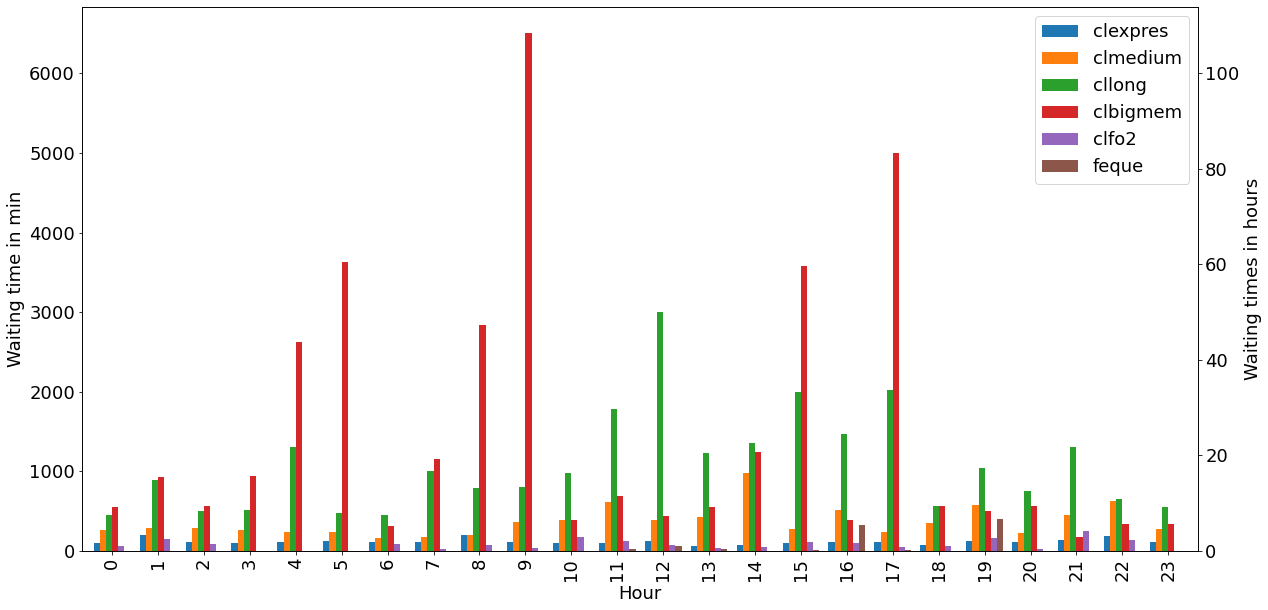

In [8]:
ax1 = histogram_dataframe(job_chars[detected_waiting_time], batch_classes).plot.bar(figsize=(20,10),width=0.8,ylabel='Waiting time in min')
ax2 = ax1.twinx()
mn, mx = ax1.get_ylim()
ax2.set_ylim(mn/60, mx/60)
ax2.set_ylabel('Waiting times in hours')

In [9]:
histogram_dataframe(job_chars[detected_waiting_time], batch_classes,weekly=True)

,clexpres,clmedium,cllong,clbigmem,clfo2,feque
Day,,,,,,
Monday,122.032927,555.286237,1386.348232,743.896548,78.375439,286.975022
Tuesday,144.845307,564.183527,976.653179,714.124029,165.972381,14.644183
Wednesday,51.697157,496.431045,2033.336303,2597.139273,121.784813,17.771839
Thursday,118.904909,835.227505,1325.154365,2722.447024,86.477273,0.137963
Friday,69.135909,656.332798,1398.393632,2924.529970,46.996105,7.421795
Saturday,311.036220,123.225644,789.926841,417.430247,85.888725,0.080556
Sunday,117.078713,284.410658,1397.452112,331.564948,23.367162,0.075000


Text(0, 0.5, 'Waiting times in hours')

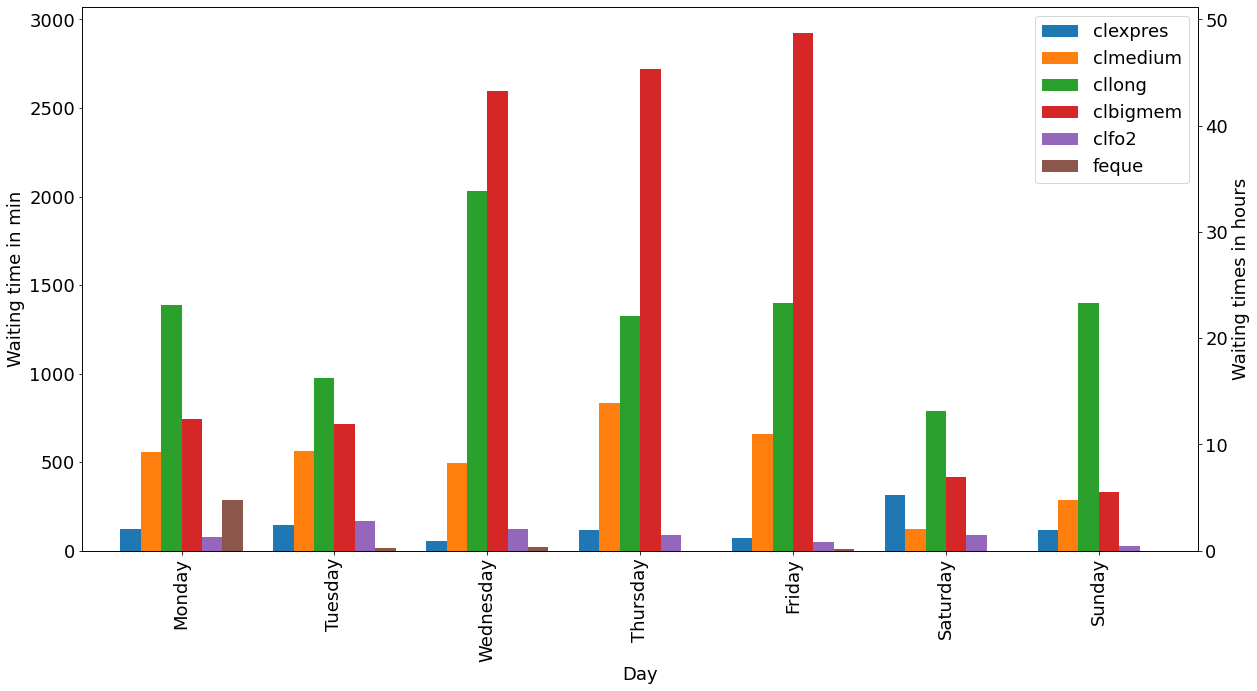

In [10]:
ax1 = histogram_dataframe(job_chars[detected_waiting_time], batch_classes,weekly=True).plot.bar(figsize=(20,10),width=0.8,ylabel='Waiting time in min')
ax2 = ax1.twinx()
mn, mx = ax1.get_ylim()
ax2.set_ylim(mn/60, mx/60)
ax2.set_ylabel('Waiting times in hours')

## Waiting time distributions grouped by hour or weekday of submission

In [11]:
def grouping_cycle(df):
    df_new                  = df.reset_index()
    df_new['Weekday']       = df_new['Submission_date'].dt.day_name()
    df_new['Hour']          = df_new['Submission_date'].dt.hour
    weekday = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    #Assign the above list to category ranking
    wDays = pd.api.types.CategoricalDtype(ordered= True, categories=weekday)
    #Apply this to the specific column in DataFrame
    df_new['Weekday'] = df_new['Weekday'].astype(wDays)
    return(df_new[['Waited','Batch_class','Weekday','Hour']])

In [12]:
def Box_plot(df,batch_class, week=False, whiskers=(10,90),wcolor='black',bcolor='black',mcolor='darkred'):
    wprops  = dict(color=wcolor)
    bprops  = dict(color=bcolor)
    mprops  = dict(color=mcolor,linewidth=4)
    df['Waited'] = df['Waited']/60
    df = df.set_index('Hour')
    
    if week:
        ax1 = df.loc[df['Batch_class'].str.contains(batch_class)].boxplot(
            column='Waited',by='Weekday',whis=whiskers,showfliers=False,
            boxprops=bprops,whiskerprops=wprops,medianprops=mprops,figsize=(20,10)
        )
        #count = pd.DataFrame(df.loc[df['Batch_class'].str.contains(batch_class)].groupby('Weekday')['Waited'].agg('count')).reset_index()
        #col  = 'Weekday'
        #count[col] = ['Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Funday']
    else:
        ax1 = df.loc[df['Batch_class'].str.contains(batch_class)].boxplot(
            column='Waited',by='Hour',whis=whiskers,showfliers=False,
            boxprops=bprops,whiskerprops=wprops,medianprops=mprops,figsize=(20,10)
        )
        #count = pd.DataFrame(df.loc[df['Batch_class'].str.contains(batch_class)].groupby('Hour')['Waited'].agg('count')).reset_index()
        #col = 'Hour'
        #count[col] = count[col]+1 
        
        
    ax1.set_ylabel('Waiting times in hours')
    ax1.set_title(batch_class)
    #ax2 = ax1.twinx()
    #ax2.bar(count[col],count['Waited'],alpha=0.1,color='midnightblue')
    #ax2.set_ylabel('Number of values used for statistic',color='midnightblue')
    #ax2.tick_params(axis='y', labelcolor='midnightblue')
    #plt.savefig("Images/daily_jobs.png", bbox_inches='tight')
    plt.show()
    #return(count)    

In [13]:
def Barplot(waited, not_waited, batch_class, week = False):
    if week:
        column = 'Weekday'
        waited_count = pd.DataFrame(waited.loc[waited['Batch_class'].str.contains(batch_class)].groupby('Weekday')['Batch_class'].agg('count')).reset_index()
        not_waited_count = pd.DataFrame(not_waited.loc[not_waited['Batch_class'].str.contains(batch_class)].groupby('Weekday')['Batch_class'].agg('count')).reset_index()
    else:
        column = 'Hour'
        waited_count = pd.DataFrame(waited.loc[waited['Batch_class'].str.contains(batch_class)].groupby('Hour')['Batch_class'].agg('count')).reset_index()
        not_waited_count = pd.DataFrame(not_waited.loc[not_waited['Batch_class'].str.contains(batch_class)].groupby('Hour')['Batch_class'].agg('count')).reset_index()
    jobs = waited_count.rename(columns={'Batch_class':'Waited'})
    jobs['Not Waited'] = not_waited_count['Batch_class']
    ax1 = jobs.set_index(column).plot.bar(figsize=(20,10),width=0.5,ylabel='Number of jobs',color=['midnightblue','darkred'],grid=True) 
    ax1.set_title(batch_class)
    return(jobs,column)

Setting non-detected waiting times to zero

In [14]:
job_chars['Waited'] = job_chars['Waited'].fillna(0)

In [15]:
job_chars['Submission_date'] = job_chars['Submission_date'].fillna(job_chars['Start_date'])

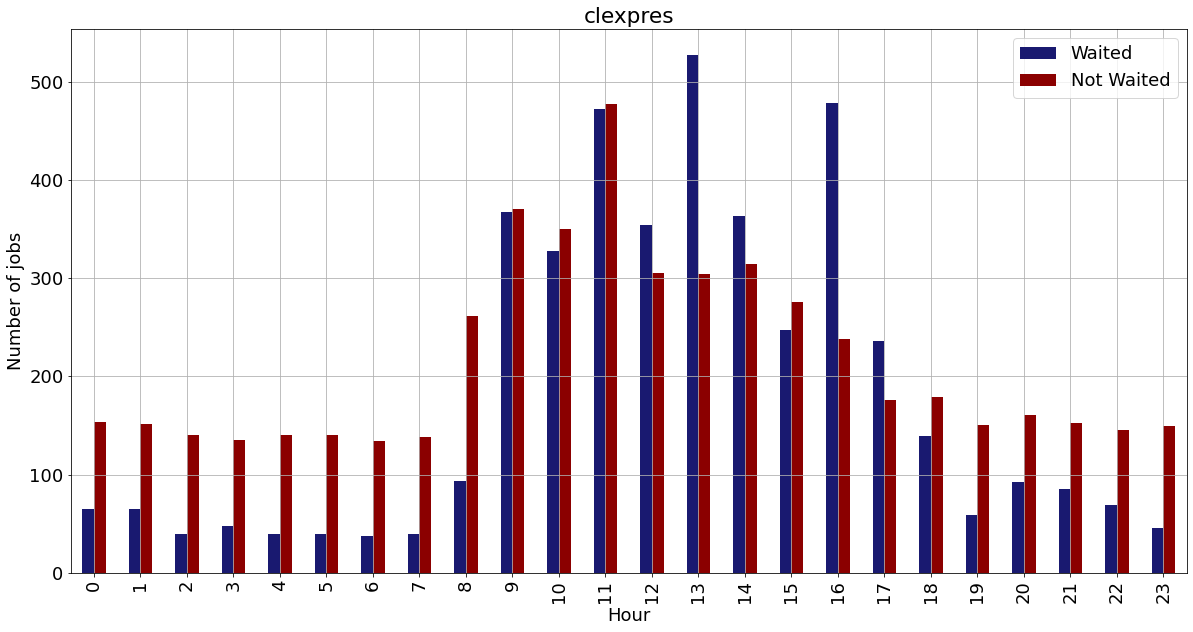

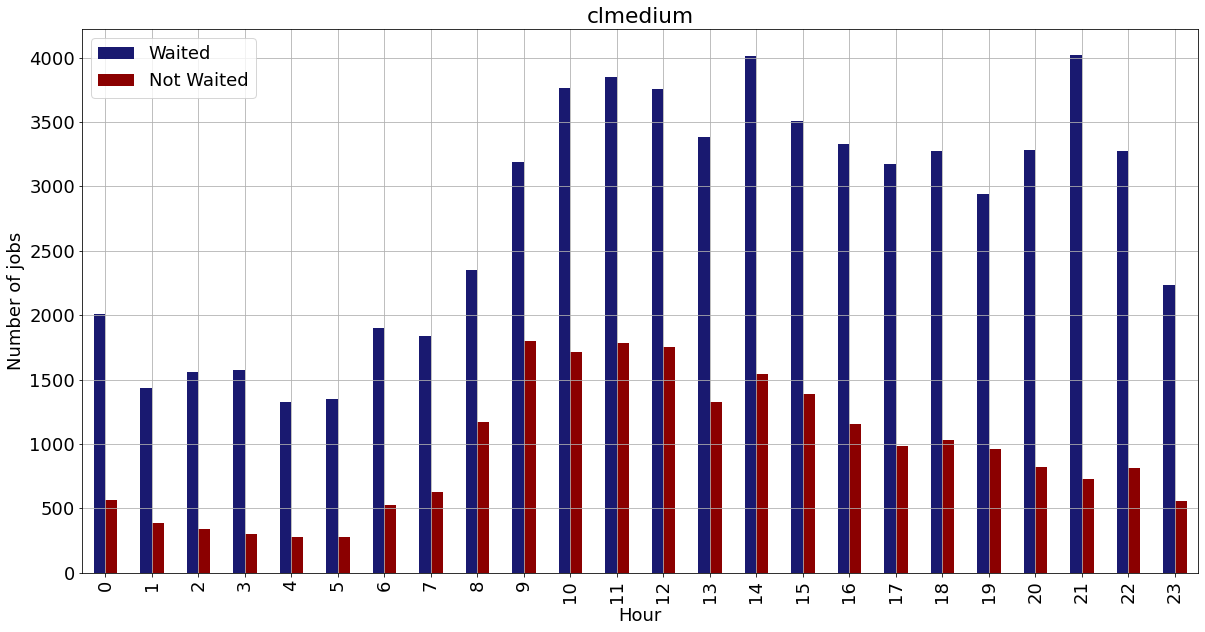

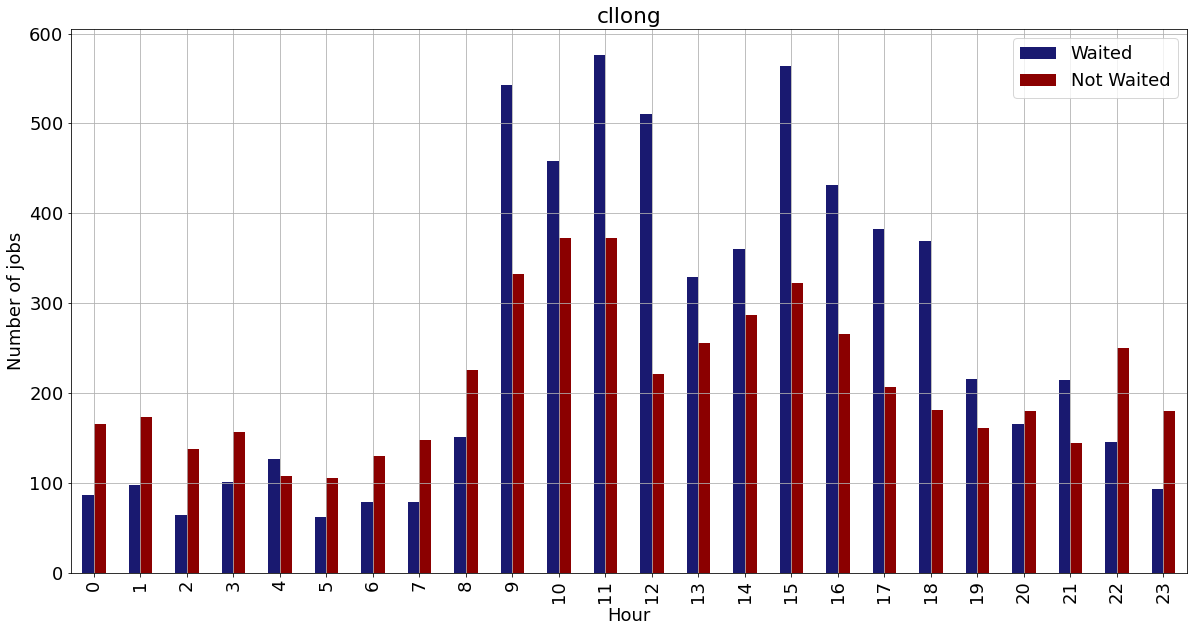

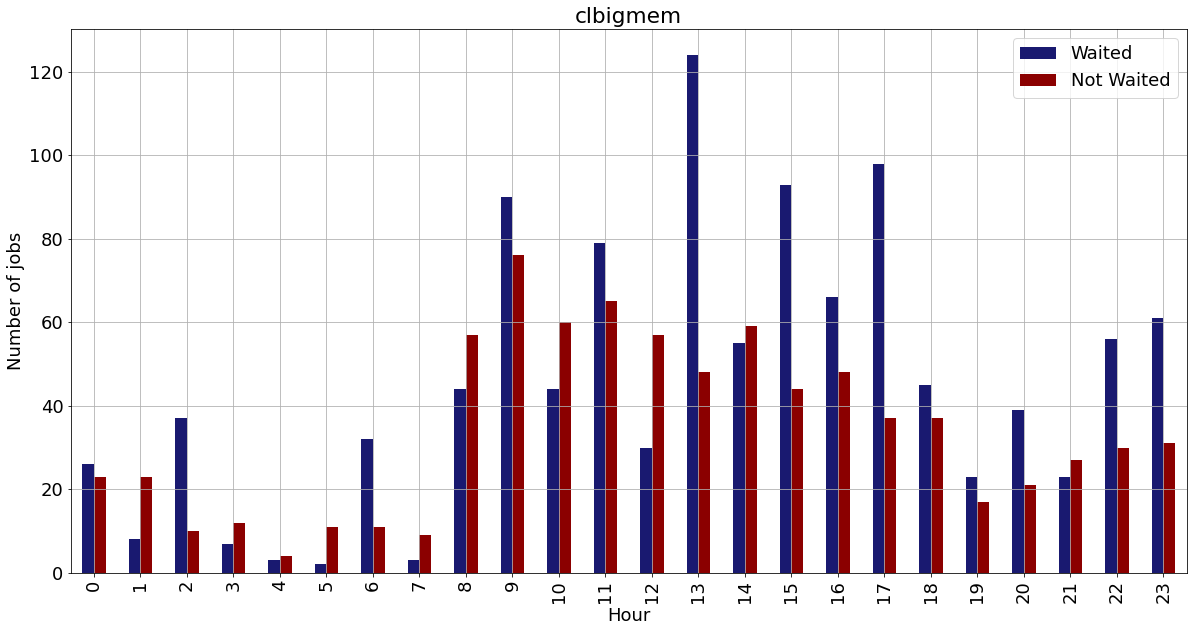

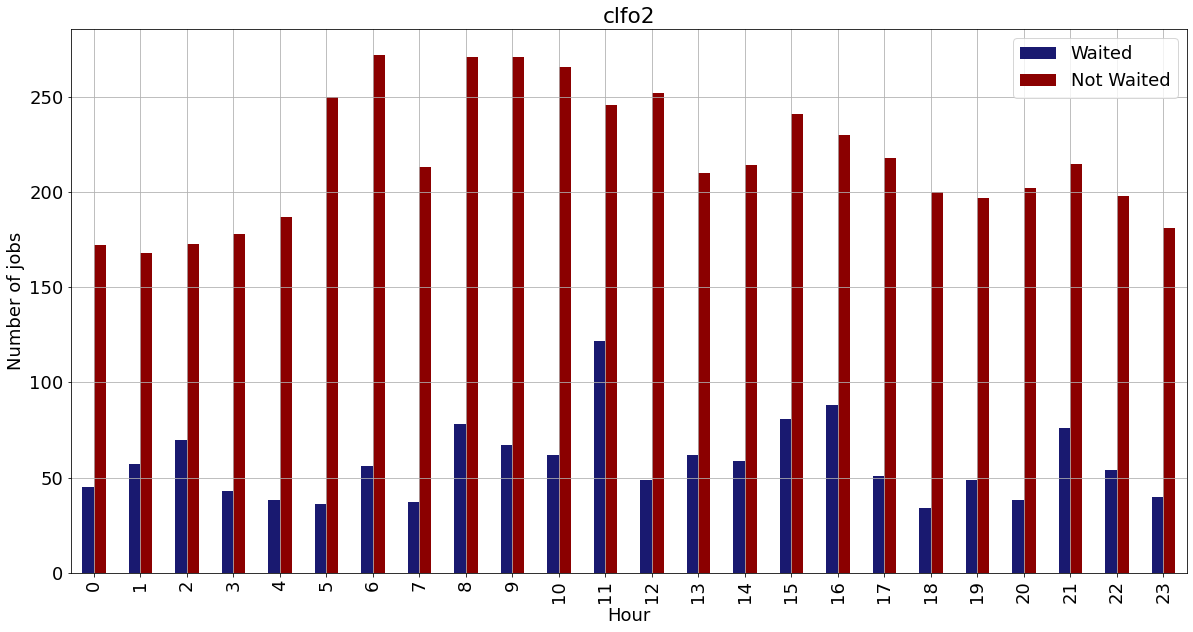

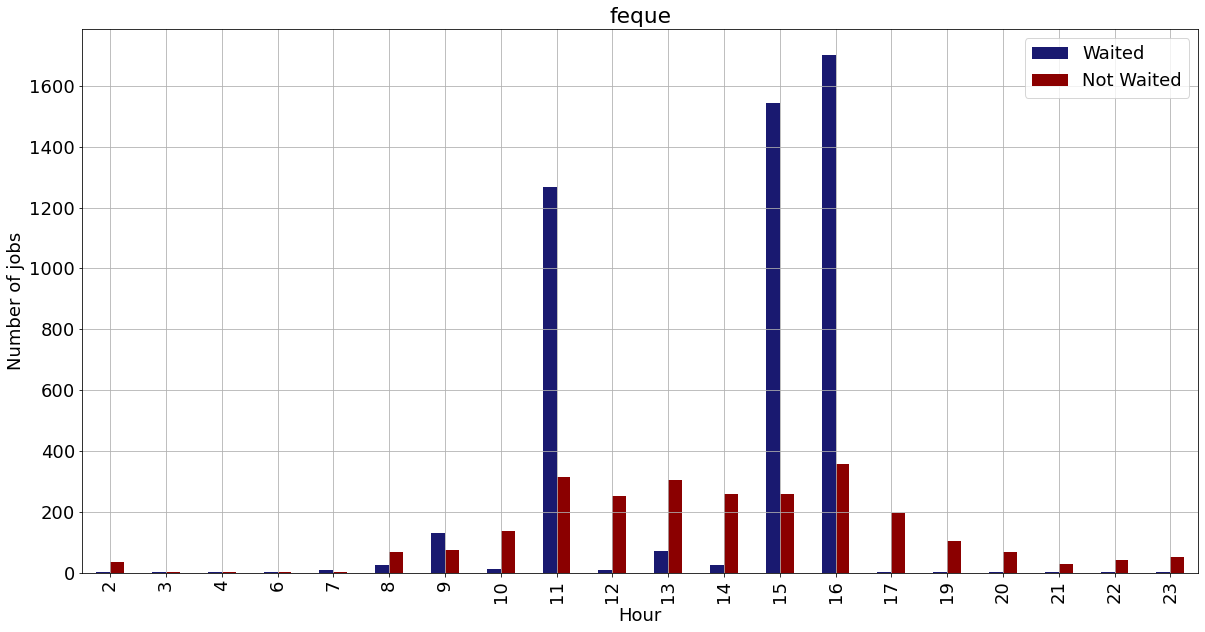

In [16]:
waited = grouping_cycle(job_chars[detected_waiting_time])
not_waited = grouping_cycle(job_chars[no_detected_waiting_time])
for batch_class in batch_classes:
    Barplot(waited,not_waited,batch_class,week=False)

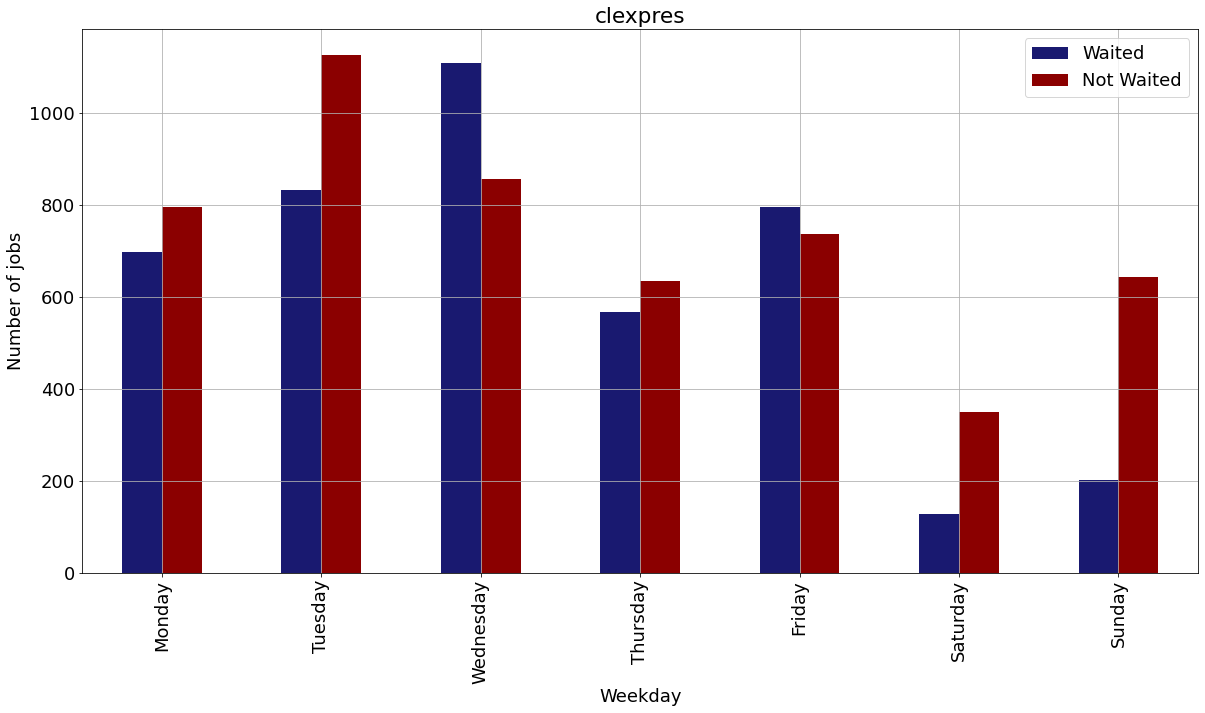

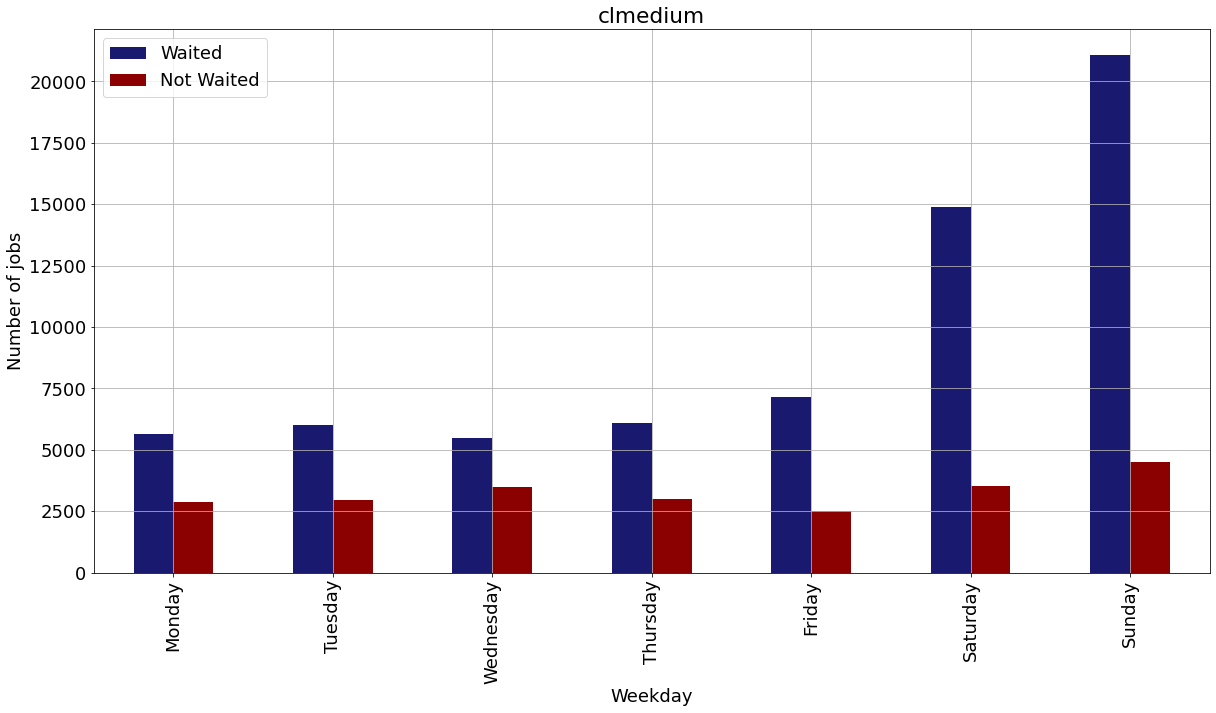

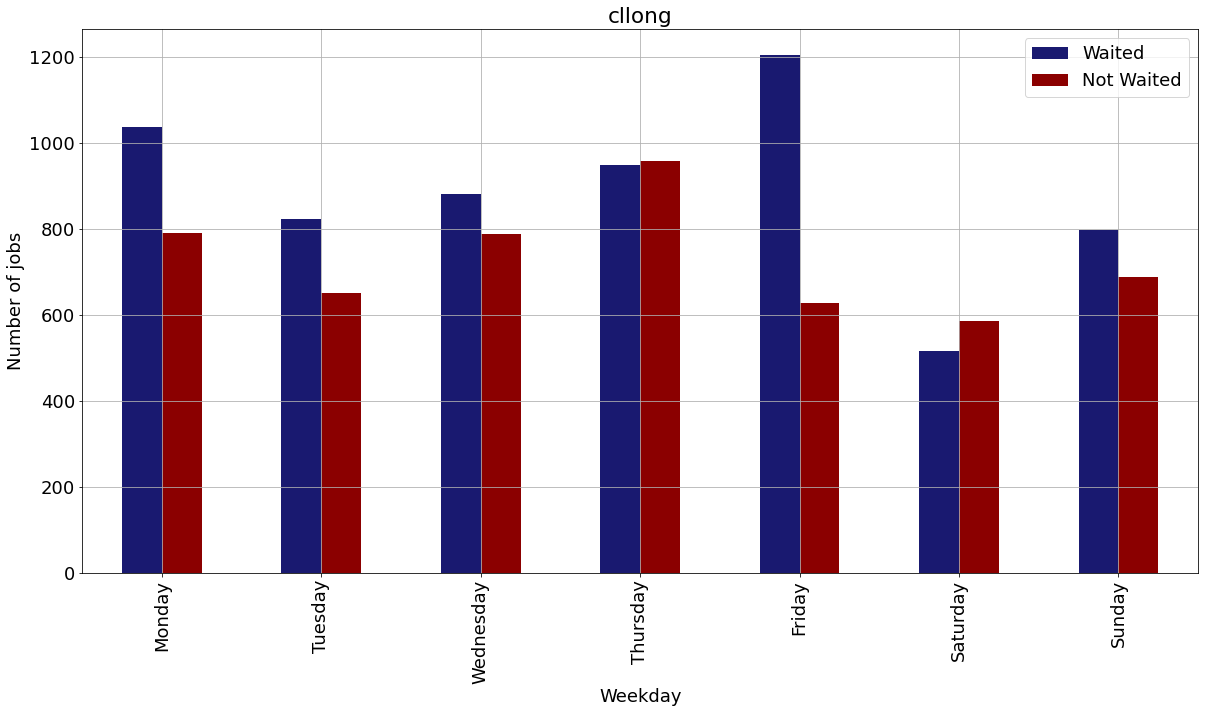

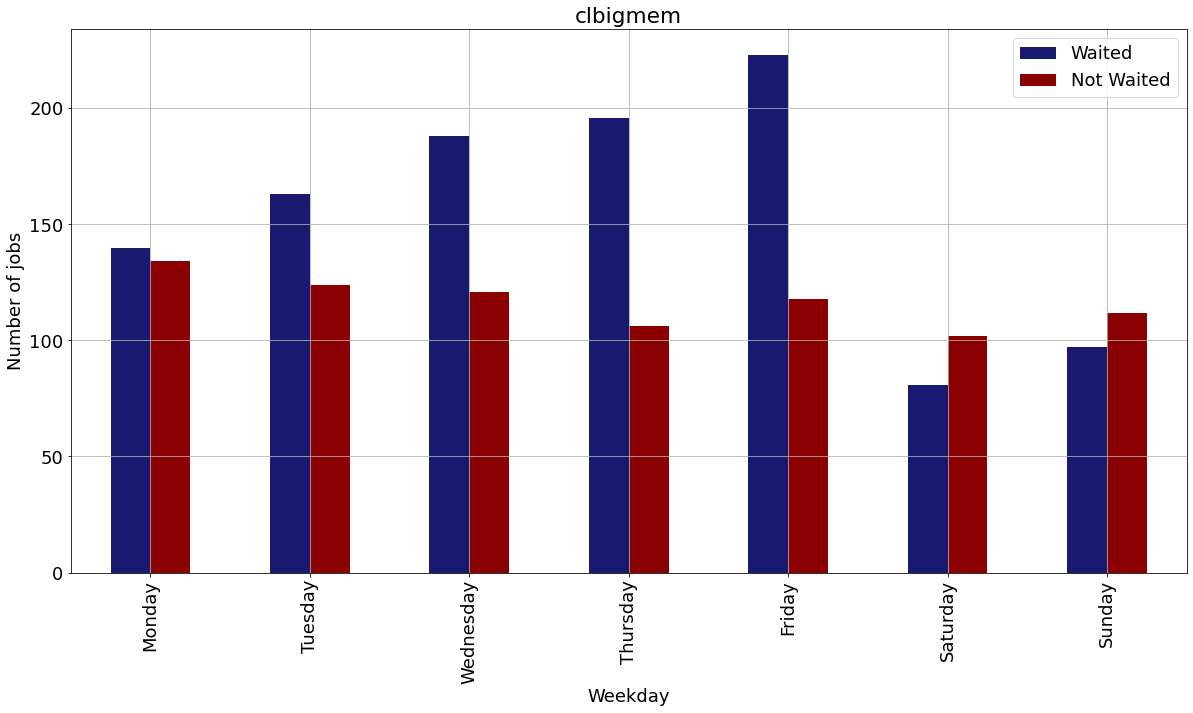

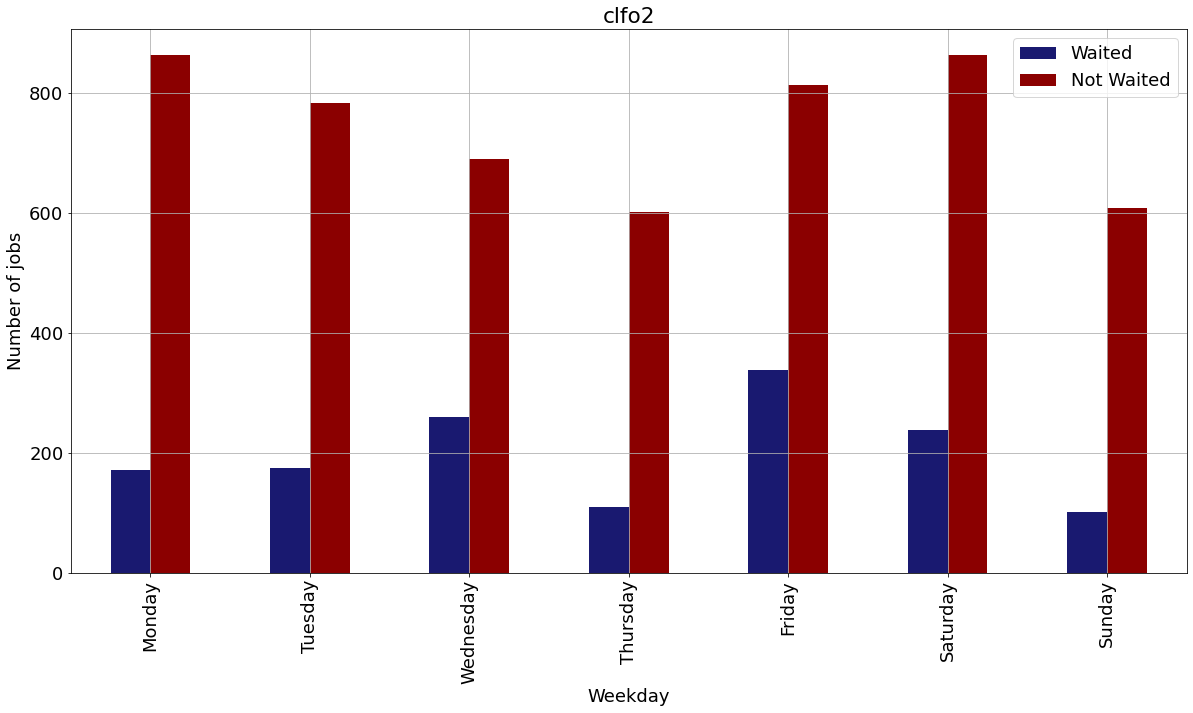

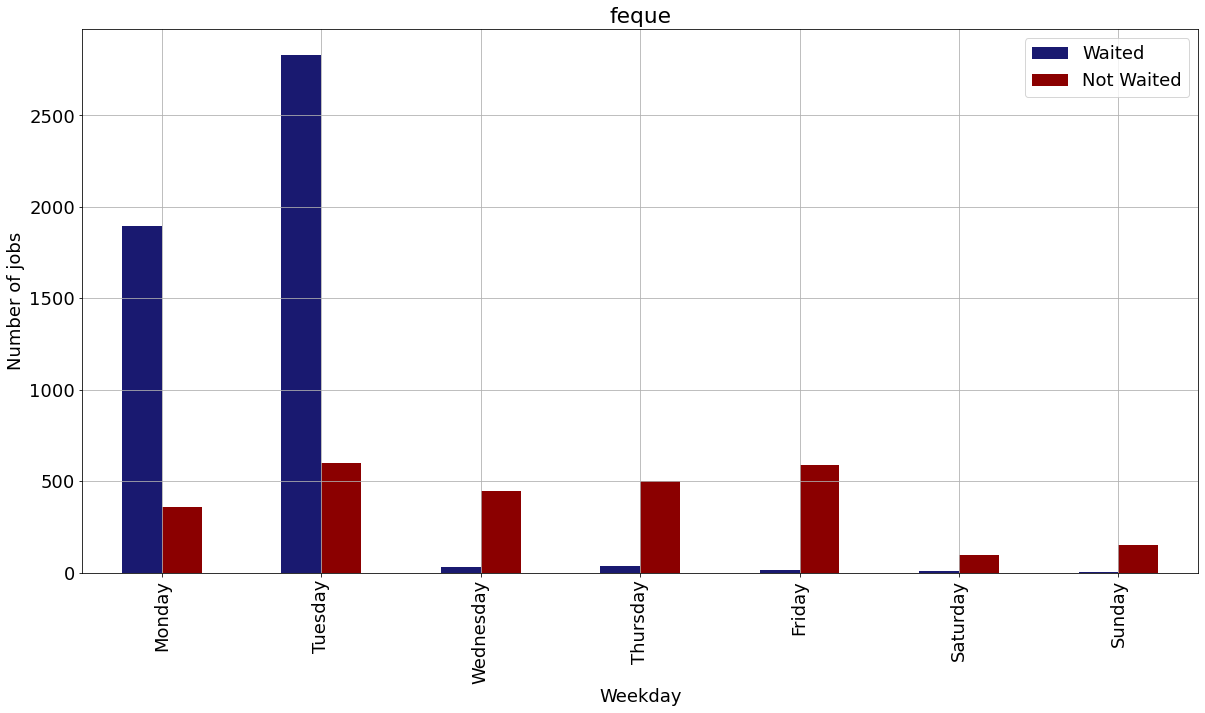

In [17]:
for batch_class in batch_classes:
    Barplot(waited,not_waited,batch_class,week=True)

## Hourly waiting time distributions

In [18]:
job_chars

,Batch_class,Submission_date,Waited,Start_date,Duration,Nodes,CPU,Memory,delta_CPU,delta_Memory
index,,,,,,,,,,
000030ecd19c9c04,feque,2020-02-18 11:14:38+01:00,29.916667,2020-02-18 11:44:33+01:00,1.450000,1.0,0.168851,0.31349,0.000000,0.000000
00020fcd04947084,clexpres,2020-05-30 11:50:05+02:00,5.383333,2020-05-30 11:55:28+02:00,4.700000,2.0,31.315993,2.02000,0.000000,0.000000
0002286e1d7e428d,clmedium,2020-09-28 07:55:47+02:00,0.000000,2020-09-28 07:55:47+02:00,60.716667,1.0,0.989072,0.04895,0.502306,0.005687
00024ec1bf68e413,clfo2,2020-06-29 01:05:19+02:00,0.000000,2020-06-29 01:05:19+02:00,0.116667,1.0,0.000000,0.00000,0.000000,0.000000
00027e89035bec8d,clmedium,2020-03-25 21:22:02+01:00,38.783333,2020-03-25 22:00:49+01:00,1.283333,1.0,21.721169,131.76000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
fffbfaccf8c9fbf4,clexpres,2020-03-27 15:05:44+01:00,0.000000,2020-03-27 15:05:44+01:00,5.033333,1.0,0.190265,0.11484,0.000000,0.000000
fffd086716a4d46c,cllong,2020-09-14 00:40:27+02:00,0.000000,2020-09-14 00:40:27+02:00,143.616667,1.0,0.994714,0.46693,0.025502,0.000300
ffff38341e8c6b3b,clmedium,2020-08-13 22:35:57+02:00,401.333333,2020-08-14 05:17:17+02:00,621.766667,8.0,31.858035,5.24000,0.662259,0.550000


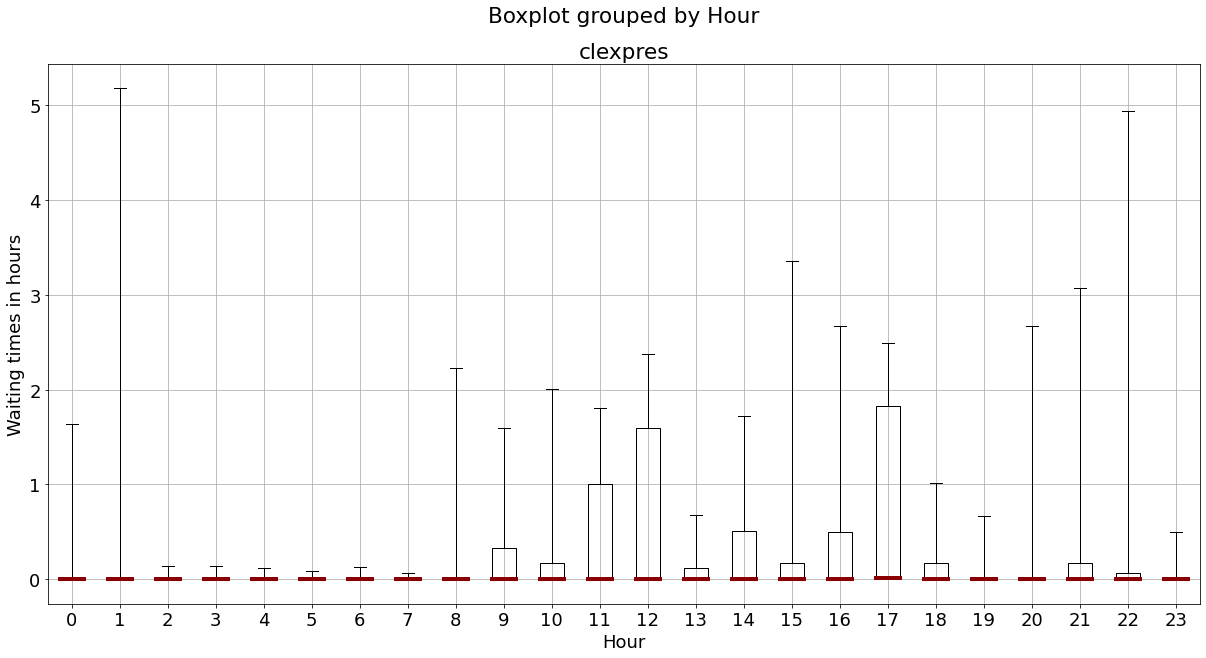

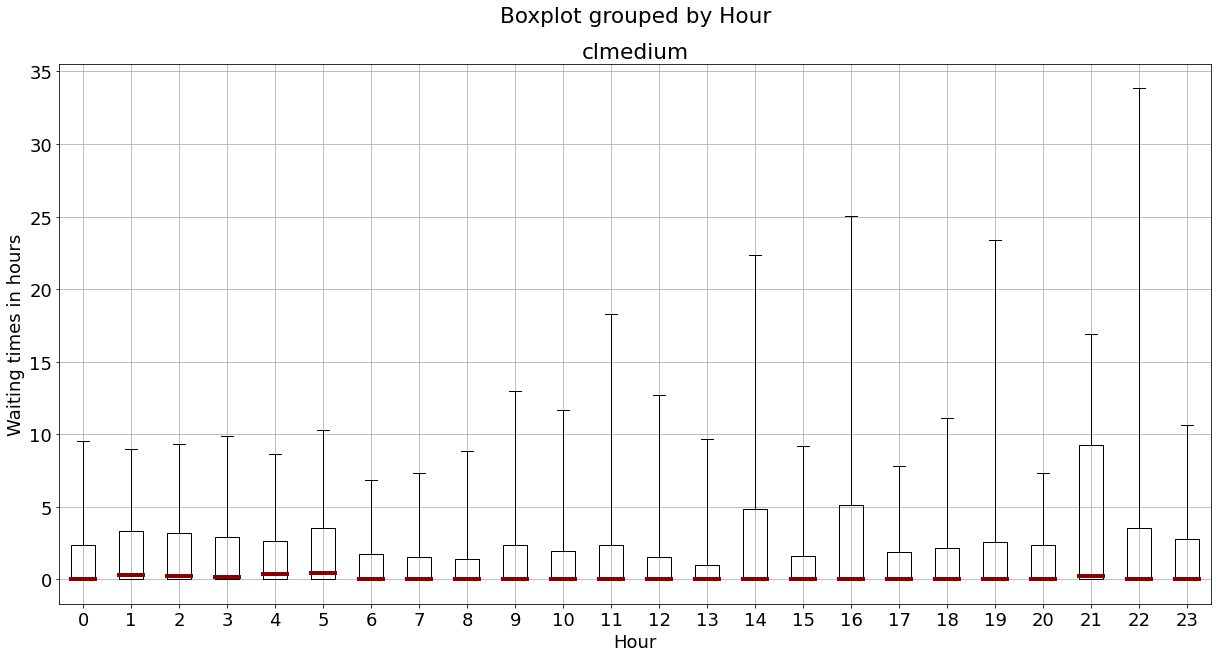

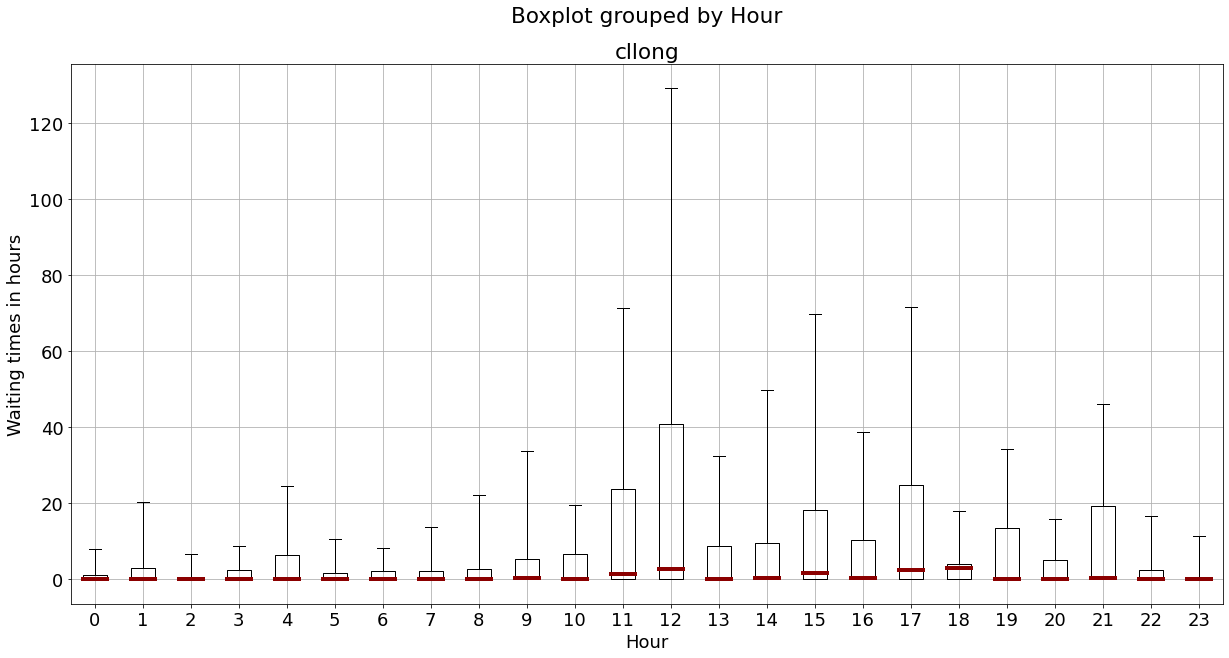

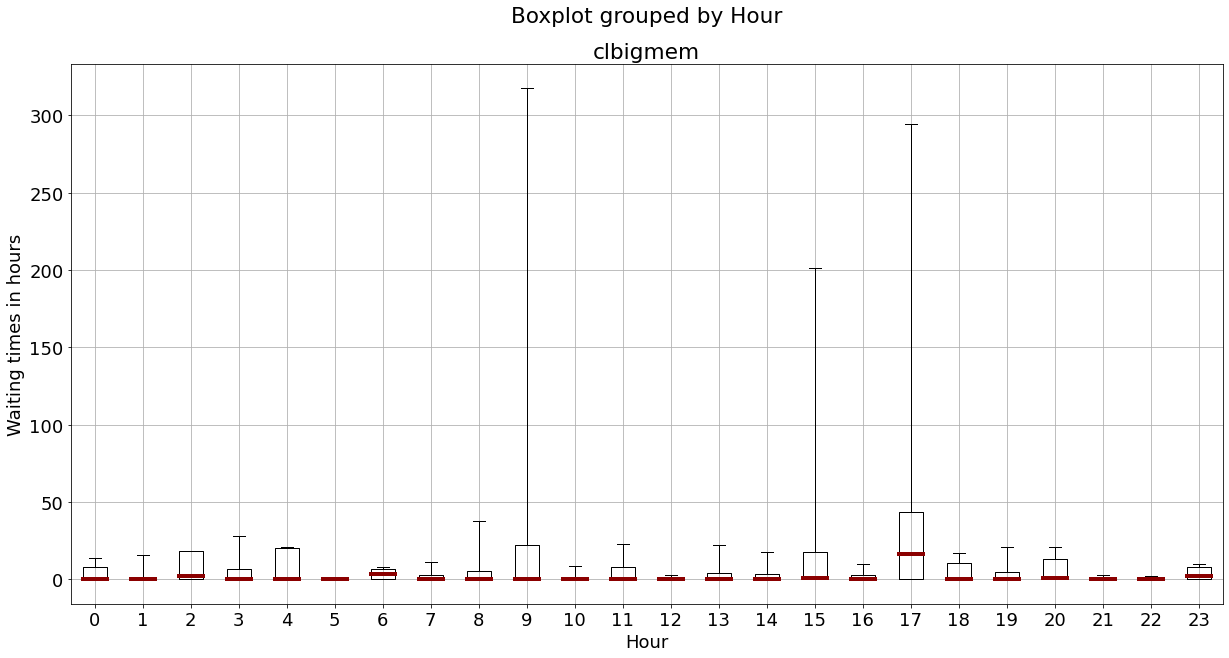

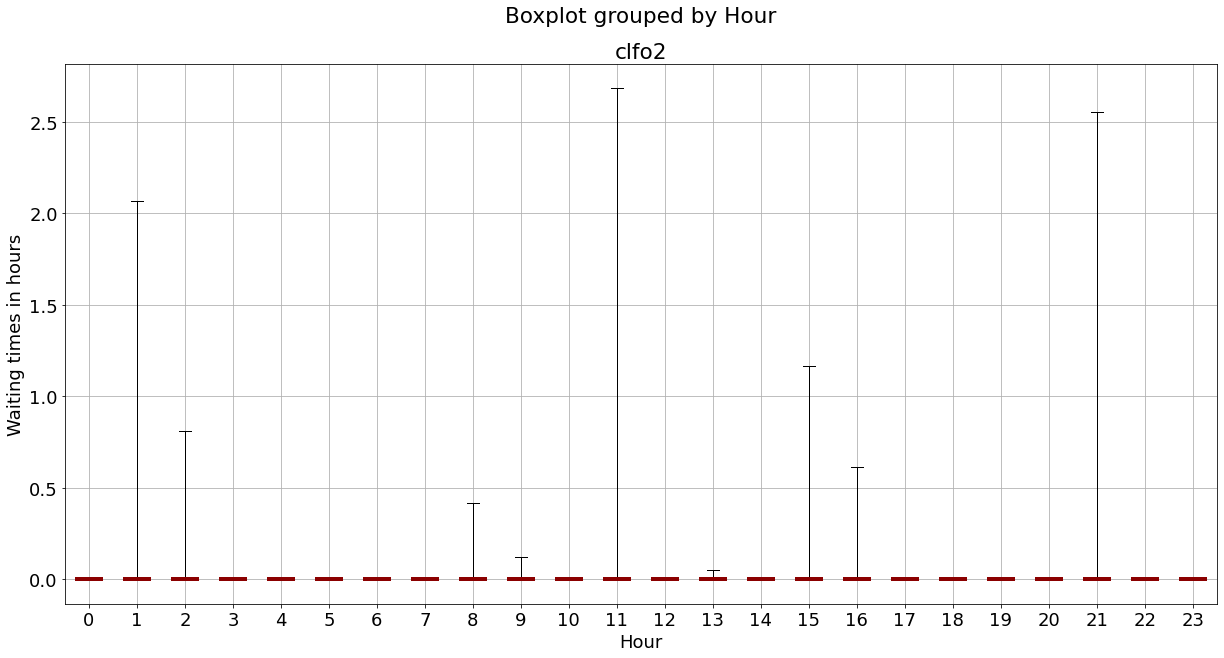

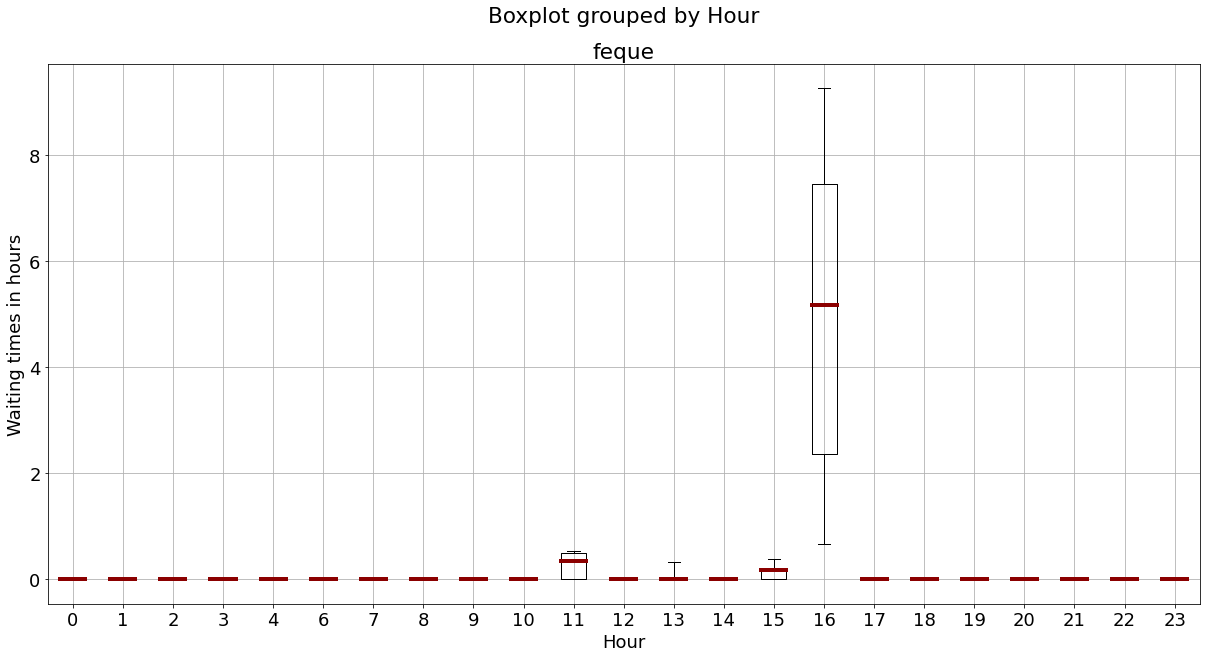

In [19]:
for batch_class in batch_classes:
    Box_plot(grouping_cycle(job_chars),batch_class)

## Weekly waiting time distributions

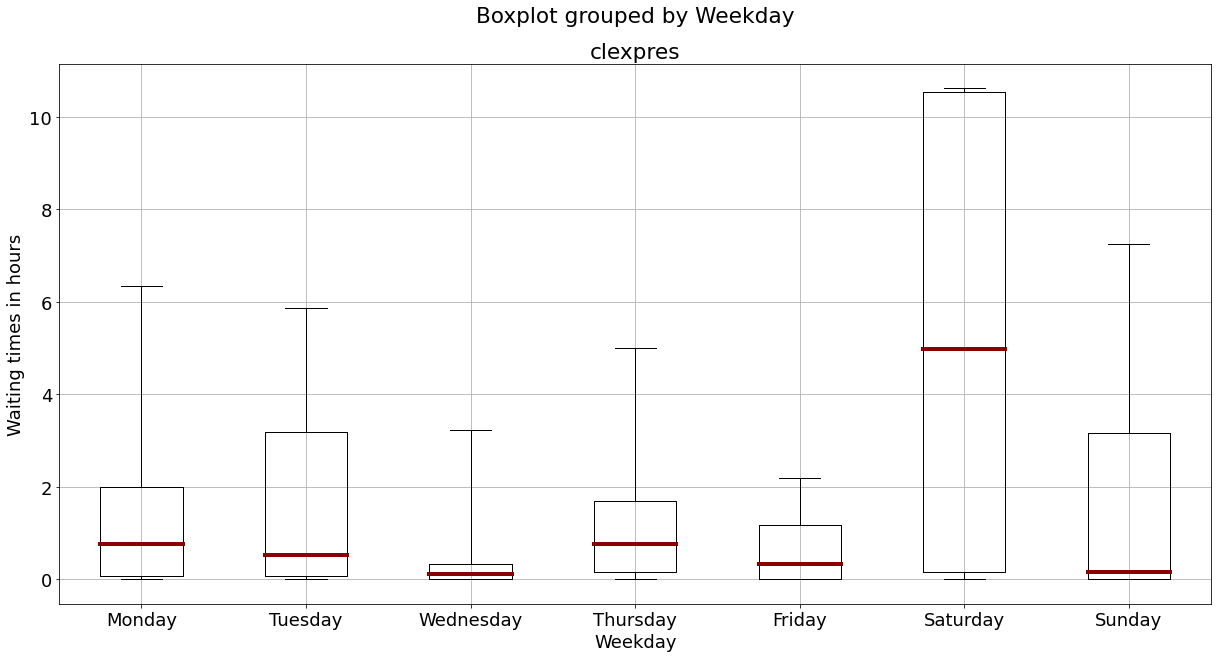

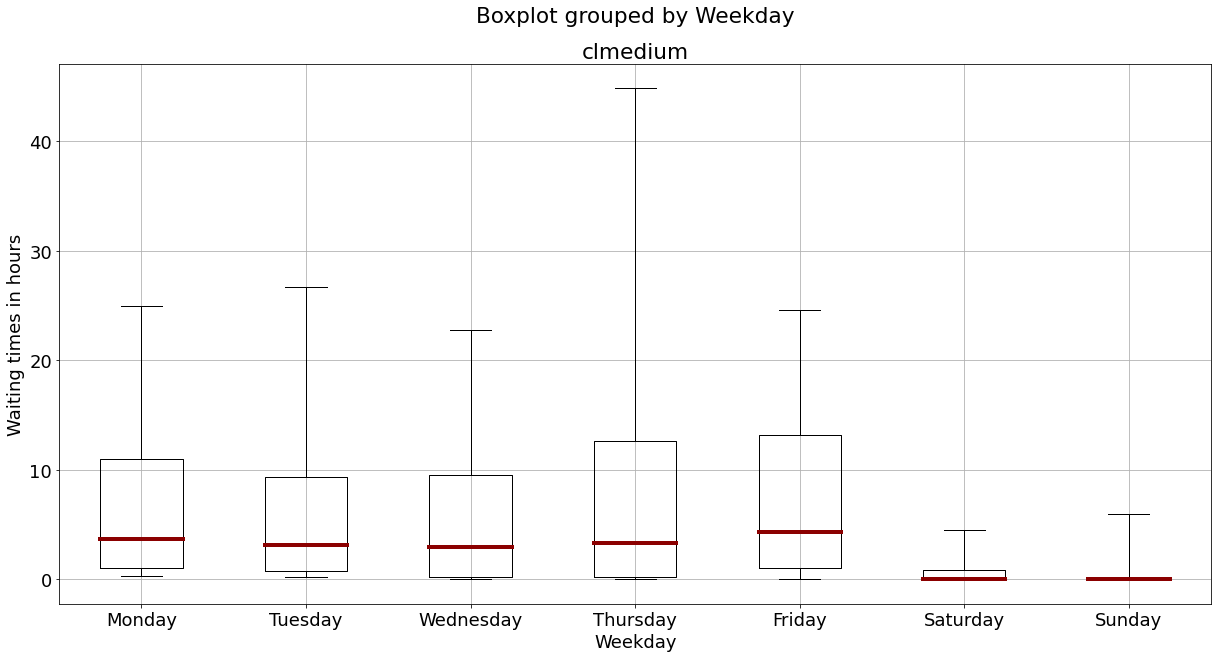

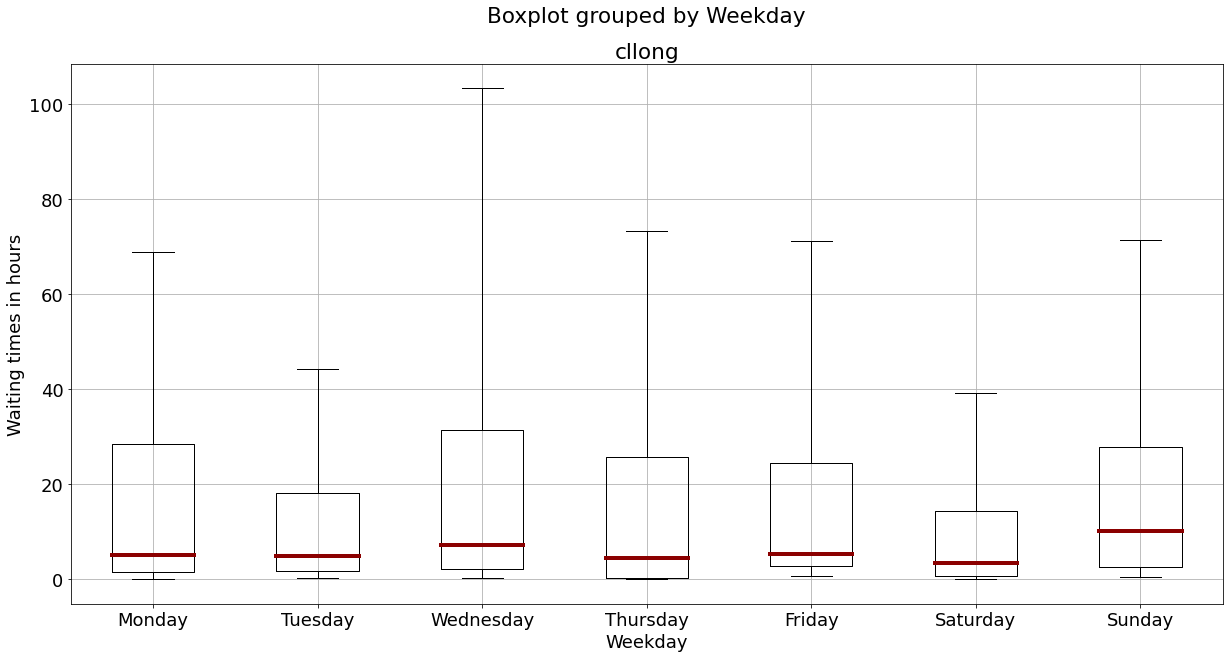

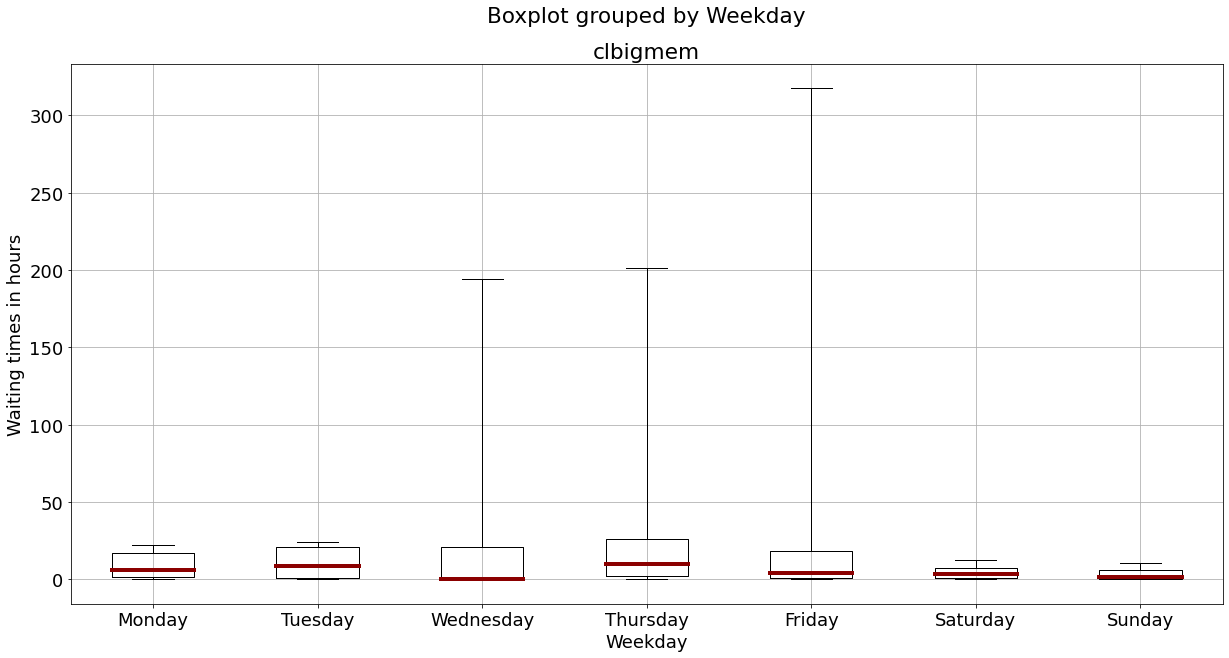

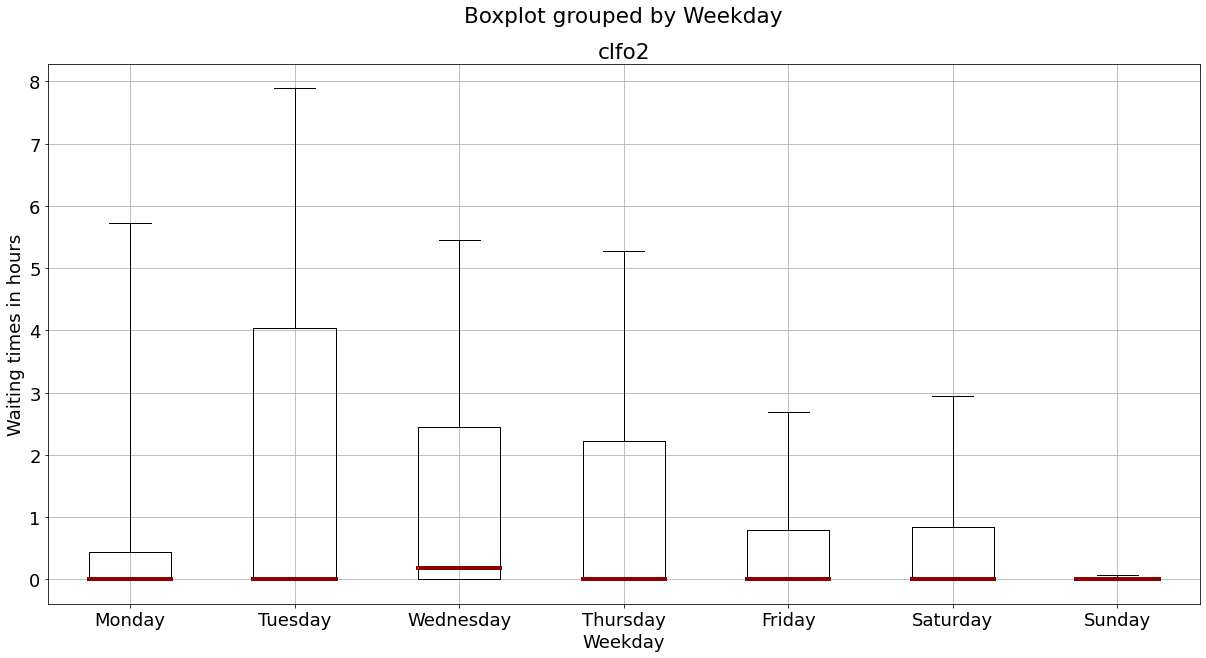

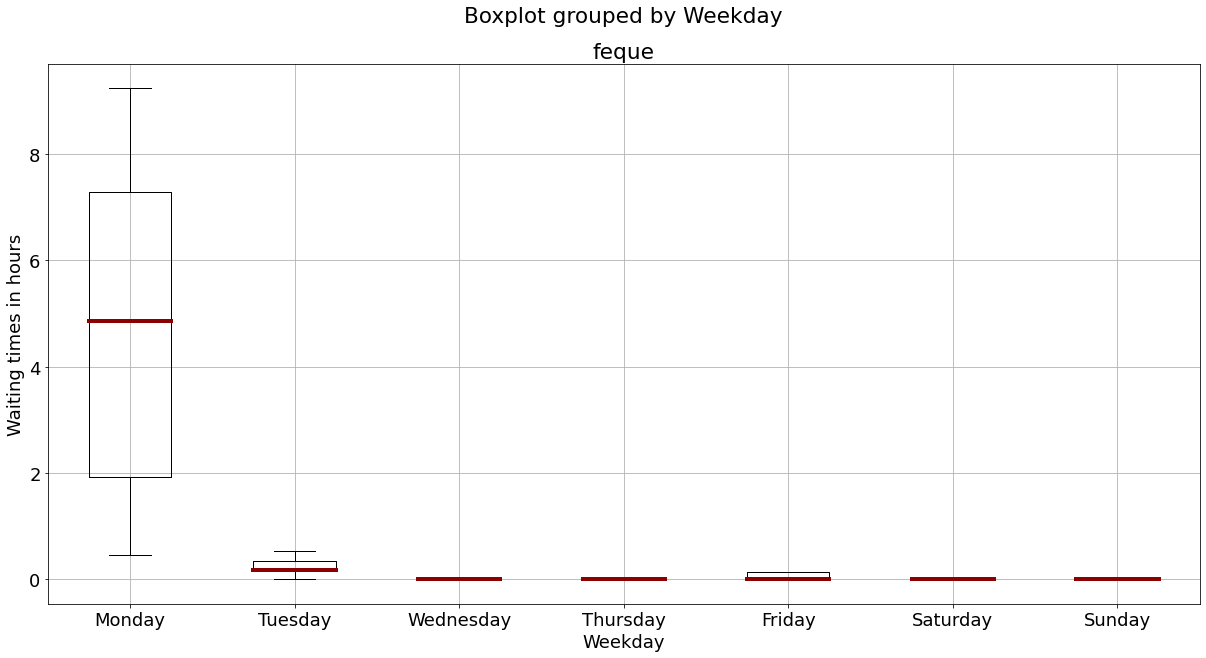

In [20]:
for batch_class in batch_classes:
    Box_plot(grouping_cycle(job_chars[detected_waiting_time]),batch_class,week=True)

In [45]:
!conda list --explicit

# This file may be used to create an environment using:
# $ conda create --name <env> --file <this file>
# platform: linux-64
@EXPLICIT
https://conda.anaconda.org/conda-forge/linux-64/git-lfs-2.11.0-0.tar.bz2
https://conda.anaconda.org/conda-forge/noarch/nomkl-1.0-h5ca1d4c_0.tar.bz2
https://conda.anaconda.org/conda-forge/linux-64/_libgcc_mutex-0.1-conda_forge.tar.bz2
https://conda.anaconda.org/conda-forge/linux-64/ca-certificates-2020.6.20-hecda079_0.tar.bz2
https://conda.anaconda.org/conda-forge/linux-64/ld_impl_linux-64-2.35-h769bd43_9.tar.bz2
https://conda.anaconda.org/conda-forge/linux-64/libgfortran5-9.3.0-he4bcb1c_17.tar.bz2
https://conda.anaconda.org/conda-forge/linux-64/libstdcxx-ng-9.3.0-h2ae2ef3_17.tar.bz2
https://conda.anaconda.org/conda-forge/linux-64/pandoc-2.11.0.4-hd18ef5c_0.tar.bz2
https://conda.anaconda.org/conda-forge/linux-64/libgfortran-ng-9.3.0-he4bcb1c_17.tar.bz2
https://conda.anaconda.org/conda-forge/linux-64/libgomp-9.3.0-h5dbcf3e_17.tar.bz2
https://conda.anacon